<a href="https://colab.research.google.com/github/JessicaAngulo/3D_cell_segmentation_Cellpose/blob/Colab/cell_segmentation_cellpose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the GitHub repo
!git clone --branch Colab https://github.com/JessicaAngulo/3D_cell_segmentation_Cellpose.git

Cloning into '3D_cell_segmentation_Cellpose'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 50 (delta 11), reused 7 (delta 6), pack-reused 24 (from 1)
Receiving objects: 100% (50/50), 61.50 MiB | 7.09 MiB/s, done.
Resolving deltas: 100% (18/18), done.
/content/3D_cell_segmentation_Cellpose


In [3]:
# Change into the repo folder
%cd 3D_cell_segmentation_Cellpose

/content/3D_cell_segmentation_Cellpose


1) Segmentation

In [4]:
!pip install cellpose tifffile scikit-image

In [5]:
from Load_tiffs import Segmentator
import tifffile
import napari
import numpy as np



Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.4 
platform:       	linux 
python version: 	3.11.12 
torch version:  	2.6.0+cu124! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




Select the parameters that best fit your data.

In [6]:
segmentator = Segmentator(
    segmentation_type=2,
    cell_diameter=100,
    model_type='cyto3',
    flow_threshold = 0.3,
    stitch_threshold = 0.1,
    skip=False,
    use_gpu=True
)

In [7]:
image = segmentator.load_images()

IndexError: list index out of range

In [6]:
masks_3d = segmentator.segmentate_image(image)

In [ ]:
tifffile.imwrite('cell_masks_2d.tif', masks_3d.astype(np.uint16))
tifffile.imwrite('cell_masks_2d.tif', image.astype(np.uint16))

In [1]:
import plotly.graph_objects as go
import numpy as np

# Assume 'label_volume' is your 3D numpy array of labeled masks
# Example: load it
# label_volume = np.load("label_mask.npy") or from tifffile.imread()

fig = go.Figure(data=go.Volume(
    x=np.repeat(np.arange(label_volume.shape[2]), label_volume.shape[1]*label_volume.shape[0]),
    y=np.tile(np.repeat(np.arange(label_volume.shape[1]), label_volume.shape[0]), label_volume.shape[2]),
    z=np.tile(np.arange(label_volume.shape[0]), label_volume.shape[1]*label_volume.shape[2]),
    value=label_volume.flatten(),
    opacity=0.1,  # lower = more transparent
    surface_count=20,  # number of isosurfaces
))

fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
))
fig.show()

ModuleNotFoundError: No module named 'ipyvolume'

2. Calculate cell volume and diameter.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Exclude background (label 0)
labels = np.unique(masks_3d)
labels = labels[labels != 0]

# Count voxels per label
voxel_counts = [(label, np.sum(masks_3d == label)) for label in labels] #(label_id, voxel_count)

In [ ]:
z_spacing = 1.0     # in microns (change to your actual value)
xy_spacing = 0.5    # in microns

voxel_volume_um3 = z_spacing * xy_spacing * xy_spacing

data = {
    'label': [label for label, count in voxel_counts],
    'voxel_count': [count for label, count in voxel_counts],
    'volume_um3': [count * voxel_volume_um3 for label, count in voxel_counts]
}

df = pd.DataFrame(data)
df.head()

,label,voxel_count,volume_um3
0,1,48154,12038.50
1,2,98298,24574.50
2,3,40819,10204.75
3,4,45687,11421.75
4,5,100069,25017.25


In [ ]:
# Save to CSV
csv_path = 'cell_volumes.csv'
df.to_csv(csv_path, index=False)

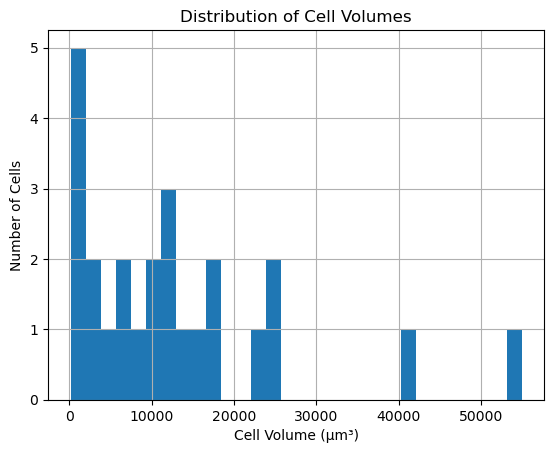

In [ ]:
# Plot histogram of volumes
plt.figure()
plt.hist(df['volume_um3'], bins=30)
plt.xlabel('Cell Volume (µm³)')
plt.ylabel('Number of Cells')
plt.title('Distribution of Cell Volumes')
plt.grid(True)
plt.show()